<a href="https://colab.research.google.com/github/eliyanto29/My-Personal-Projects/blob/master/FUZZY_CNN_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fuzzy Sentiment Analysis Using CNN**
*Mathematics Department, Universitas Ahmad Dahlan, Indonesia*

https://math.uad.ac.id/

**Author**  : Sugiyarto, Ph.D dan Joko Eliyanto, S.Si

**Email**  : joko1400015006@webmail.uad.ac.id

###Abstraksi

Sentimen analisis adalah salah satu bagian dari natural language processing. Analisis sentimen dapat dilakukan dengan berbasis kamus, atau berbasis machine learning. Analisis sentimen berbasis machine learning memiliki kelebihan kedinamisan untuk bertemu dengan dataset bahasa baru atau kosa kata baru.  Analisis sentimen berusaha untuk memahami sentimen yang terkandung dalam suatu kalimat. Sebuah kalimat bisa memiliki sentimen positif, netral atau negatif. Meskipun demikian, faktanya setiap kalimat tidak selalu bersentimen positif, negatif, atau netral secara jelas. Kami berusaha mengembangkan metode sentimen analisis yang dapat menunjukkan derajat sentimen suatu kalimat. Sentimen analisis fuzzy convolutional neural network diperkenalkan dalam makalah ini untuk menghasilkan hasil analisis sentimen yang lebih akurat. Convolutional neural network adalah metode machine learning yang popular untuk sentimen analisis. Konsep himpunan fuzzy digunakan untuk menyatakan derajat sentimen sebuah kalimat. Analisis jarak euclidean untuk menentukan kedekatan dua buah vektor digunakan untuk menunjukkan bahwa metode ini lebih baik dari metode standar. Metode yang kami ajukan berhasil menghasilkan sebuah nilai yang menunjukkan derajat sentimen sebuah kalimat. Perbandingan jarak euclid antara hasil sentimen analisis standar dan metode kami menunjukkan bahwa hasil fuzzy convolutional neural network memiliki jarak yang relatif dekat dengan nilai sentimen sesungguhnya. Sentimen analisis fuzzy convolutional neural network terbukti dapat menghasilkan hasil sentimen analisis yang lebih halus daripada metode standar.

###Import Modul

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten

import tensorflow as tf
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split

###Dataset

This data originally came from Crowdflower's Data for Everyone library.
As the original source says,
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
Link: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

###Mengakses Dataset

In [ ]:
link='https://raw.githubusercontent.com/eliyanto29/Fuzzy-Sentiment-Analisis/master/Tweets.csv'
df=pd.read_csv(link)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
#Menghapus semua kolom kecuali kolom airline_sentiment dan teks.
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


###Eksplorasi Dataset

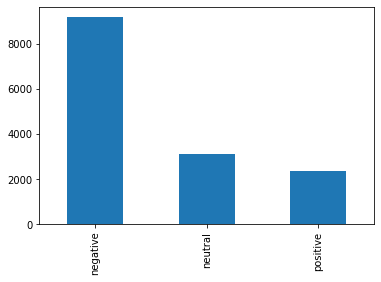

In [ ]:
#Menghitung jumlah sentiment
df['airline_sentiment'].value_counts().sort_index().plot.bar()

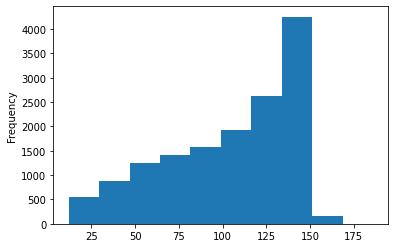

In [ ]:
#Menghitung jumlah teks
df['text'].str.len().plot.hist()

###Data Cleaning

In [ ]:
#Menghapus kata @VirginAmerica
df['text'] = df['text'].str.replace('@VirginAmerica', '')
df.head()

,airline_sentiment,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experien...
2,neutral,I didn't today... Must mean I need to take an...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it


In [ ]:
#Menghapus karakter yang tidak diinginkan
df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
df['text'].head()

0                                   What dhepburn said
1     plus youve added commercials to the experienc...
2     I didnt today Must mean I need to take anothe...
3     its really aggressive to blast obnoxious ente...
4              and its a really big bad thing about it
Name: text, dtype: object

In [ ]:
#Mengkodekan sentimen negatif=0, netral=1 dan positif=2
cleanup_nums = {"airline_sentiment":     {"negative": 0, "neutral": 1, "positive":2}}
df.replace(cleanup_nums, inplace=True)
df.airline_sentiment.head(8)

0    1
1    2
2    1
3    0
4    0
5    0
6    2
7    1
Name: airline_sentiment, dtype: int64

In [ ]:
text=df['text'].tolist()
print(len(text))

14640


In [ ]:
y=df['airline_sentiment']
y=to_categorical(y)
print(y)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
df['airline_sentiment'].value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

### Data Preparation

In [ ]:
token =Tokenizer()
token.fit_on_texts(text)

In [ ]:
#token.index_word

In [ ]:
vocab=len(token.index_word)+1
print(vocab)

16696


In [ ]:
encode_text=token.texts_to_sequences(text)
print(encode_text)

[[57, 6617, 217], [540, 535, 1122, 2459, 1, 2, 196, 6618], [3, 184, 97, 774, 564, 3, 75, 1, 147, 142, 190], [64, 131, 3670, 1, 4604, 4605, 980, 15, 21, 3098, 3671, 61, 54, 22, 487, 2723], [10, 64, 4, 131, 468, 206, 488, 80, 20], [428, 76, 274, 290, 4, 8, 7, 191, 26, 184, 22, 29, 2056, 64, 131, 2, 111, 206, 488, 80, 124, 1789], [166, 1429, 300, 47, 3, 103, 2225, 29, 4606, 6619, 210, 127, 463], [131, 279, 4, 3099, 1694, 7, 3672, 324, 3673, 6620, 71, 6621], [1002, 186, 3, 6622, 39, 3, 43, 1512], [20, 23, 348, 10, 565, 40, 90, 356, 226, 167, 132, 1, 19], [114, 6, 108, 26, 2460, 14, 2, 592, 2057, 743, 18, 1430, 1695, 2461, 2226], [3, 1313, 674, 6623, 44, 174, 213, 157, 6624, 6625, 1512], [29, 14, 552, 4, 113, 623, 215, 1431, 80, 11, 618, 190, 1, 1696, 61, 3, 339, 135, 954, 9, 11, 349, 190, 247, 1916], [6626, 48, 124, 21, 1917, 6627, 1600, 102, 116, 147, 67, 2, 1918, 463, 33, 169, 6628], [36], [6629, 806, 14, 72, 927], [44, 955, 7, 11, 149, 1314, 837, 8, 296, 1, 728, 112, 553, 249, 31, 113, 

In [ ]:
max_kata=100
X = pad_sequences(encode_text, maxlen=max_kata, padding='post')
X

array([[  57, 6617,  217, ...,    0,    0,    0],
       [ 540,  535, 1122, ...,    0,    0,    0],
       [   3,  184,   97, ...,    0,    0,    0],
       ...,
       [  13,   73,  634, ...,    0,    0,    0],
       [  13,    6,   22, ...,    0,    0,    0],
       [  13,   38,   22, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,test_size=0.2, stratify=y) 

In [ ]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

###Mendefinisikan Model CNN

In [ ]:
#Mendefinisikan model CNN
model=Sequential()                                                                      #Model sekuensial
model.add(Embedding(vocab, 256, input_length=max_kata))                                 #Embedding (Layer Input)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))         #Layer Konvolusi
model.add(Dropout(0.5))         
model.add(MaxPooling1D(pool_size=2))                                                    #Layer MaxPooling
model.add(Flatten())                                                                    #Flatten
model.add(Dense(16, activation='relu'))                                                 #Layer perseptron
model.add(Dense(3, activation='softmax'))                                               #Layer Output

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          4274176   
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           24608     
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                25616     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 5

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Melatih Model

In [ ]:
history=model.fit(X_train, 
                  y_train, 
                  validation_data=(X_test, y_test), 
                  epochs=100)

Epoch 1/100
366/366 [==============================] - 14s 39ms/step - loss: 0.6810 - accuracy: 0.7122 - val_loss: 0.5252 - val_accuracy: 0.8036
Epoch 2/100
366/366 [==============================] - 14s 39ms/step - loss: 0.3847 - accuracy: 0.8552 - val_loss: 0.4902 - val_accuracy: 0.8084
Epoch 3/100
366/366 [==============================] - 14s 40ms/step - loss: 0.2284 - accuracy: 0.9171 - val_loss: 0.5357 - val_accuracy: 0.8036
Epoch 4/100
366/366 [==============================] - 14s 39ms/step - loss: 0.1417 - accuracy: 0.9536 - val_loss: 0.5841 - val_accuracy: 0.7944
Epoch 5/100
366/366 [==============================] - 14s 39ms/step - loss: 0.0952 - accuracy: 0.9674 - val_loss: 0.6637 - val_accuracy: 0.7999
Epoch 6/100
366/366 [==============================] - 14s 39ms/step - loss: 0.0693 - accuracy: 0.9758 - val_loss: 0.7425 - val_accuracy: 0.7889
Epoch 7/100
366/366 [==============================] - 14s 39ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.8030 - val_ac

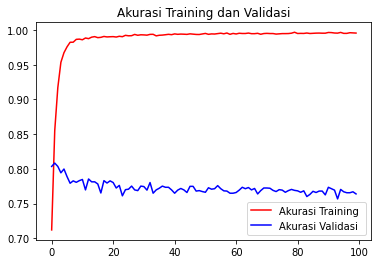

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

### Sentimen Fuzzy

Pendefinisian Ulang Sentimen [0] Negatif, [0.5] Netral, [1] Positif

In [ ]:
link='https://raw.githubusercontent.com/eliyanto29/Fuzzy-Sentiment-Analisis/master/Tweets.csv'
df=pd.read_csv(link)

#Menghapus semua kolom kecuali kolom airline_sentiment dan teks.
df = df[['airline_sentiment', 'text']]

#Mengkodekan sentimen negatif=0 dan netral=0.5, positif=1
cleanup_nums = {"airline_sentiment":     {"negative": 0, "neutral": 0.5, "positive":1}}
df.replace(cleanup_nums, inplace=True)
df.airline_sentiment.head(8)
df.head()

,airline_sentiment,text
0,0.5,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.5,@VirginAmerica I didn't today... Must mean I n...
3,0.0,@VirginAmerica it's really aggressive to blast...
4,0.0,@VirginAmerica and it's a really big bad thing...


In [ ]:
#Fungsi sentimen fuzzy
def single_fuzzy_sentiment_biner(txt):
  x=[txt]
  x=token.texts_to_sequences(x)
  x=pad_sequences(x, maxlen=max_kata, padding='post')
  predictions=model.predict(x)
  probability=predictions[0].tolist()
  fuzzy_sentiment=0.5-((1/2)*probability[0])+((0)*probability[1])+((1/2)*probability[2])
  return fuzzy_sentiment

In [ ]:
#Menjalankan fungsi sentimen fuzzy
print(text[3])
print('Sentimen Fuzzy:')
print(single_fuzzy_sentiment_biner(text[3]))
print('Sentimen Label:')
print(df.airline_sentiment[3])

 its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Sentimen Fuzzy:
7.584782466572642e-16
Sentimen Label:
0.0


In [ ]:
#Fungsi uji sentimen kalimat(positif atau negatif)[STANDAR]
def sentimen_analysis(x):
  x=[x]
  x=token.texts_to_sequences(x)
  x=pad_sequences(x, maxlen=max_kata, padding='post')
  return model.predict_classes(x)

In [ ]:
#Menjalankan fungsi sentimen fuzzy dan standar
x=text[3]
print(x)
print('Sentimen Label')
print(df.airline_sentiment[3])
print('Sentimen analisis dengan CNN')
print(sentimen_analysis(x))
print('Fuzzy sentimen analisis dengan CNN')
single_fuzzy_sentiment_biner(x)

 its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Sentimen Label
0.0
Sentimen analisis dengan CNN
[0]
Fuzzy sentimen analisis dengan CNN


7.584782466572642e-16

### Evaluasi Sentimen Fuzzy

In [ ]:
#Mendefinisikan fungsi fuzzy sentimen pada satu kolom(banyak kalimat)
def fuzzy_sentimen_column(bahan):
  fuzzy_sentimen_kolom=[]
  #print(x)
  for kalimat in bahan:
    fuzzy_sentimen_kolom.append(single_fuzzy_sentiment_biner(kalimat))
    #print(fuzzy_sentimen_kolom)
  return fuzzy_sentimen_kolom

In [ ]:
#Mendefinisikan fungsi uji sentimen pada satu kolom(banyak kalimat)
def sentimen_column(bahan):
  x=token.texts_to_sequences(bahan)
  x=pad_sequences(x, maxlen=max_kata, padding='post')
  word_sentimen=model.predict_classes(x)
  word_sentimen=gabung_sublist(word_sentimen)
  return word_sentimen

In [ ]:
#Fungsi menggabung sublist
def gabung_sublist(list1):
  list2=[]
  for i in list1:
    list2.append(float(i))
  return list2

In [ ]:
#Mendefinisikan pengurangan dua list
def substract_two_list(list1,list2):
  difference = []
  zip_object = zip(list1, list2)
  for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)
  return difference

In [ ]:
#Menghitung jarak euclid vektor sentimen(asli) dan prediksi CNN dan prediksi fuzzy sentimen
bahan=text
hasil1=fuzzy_sentimen_column(bahan)
hasil2=sentimen_column(bahan)
sentimencoba=df.airline_sentiment
print('Jarak Euclid Fuzzy Sentimen Analysis:')
print((abs(sum(substract_two_list(hasil1,sentimencoba))))**(0.5))
print('Jarak Euclid Sentimen Analysis Standar:')
print((abs(sum(substract_two_list(hasil2,sentimencoba))))**(0.5))
print('Contoh Nilai Fuzzy Sentiment')
print(hasil1[:8])
print('Contoh Nilai Sentiment Standar')
print(hasil2[:8])
print('Contoh Nilai Label Sentiment')
print(sentimencoba[:8])

Jarak Euclid Fuzzy Sentimen Analysis:
8.899387405935755
Jarak Euclid Sentimen Analysis Standar:
61.46950463441201
Contoh Nilai Fuzzy Sentiment
[0.49999789668740763, 0.9999999978458738, 0.4999982149181661, 7.584782466572642e-16, 1.932930364034746e-05, 4.76839017454156e-18, 0.9999999992039752, 0.49999999999999983]
Contoh Nilai Sentiment Standar
[1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0]
Contoh Nilai Label Sentiment
0    0.5
1    1.0
2    0.5
3    0.0
4    0.0
5    0.0
6    1.0
7    0.5
Name: airline_sentiment, dtype: float64


### Kesimpulan

Fuzzy Sentimen Analisis menyajikan sentimen sebuah kalimat dalam bentuk fuzzy atau derajat sentimen sebuah kalimat(tidak pasti[0 1])

**Akhir dokumen**

---